In [9]:
import datetime as dt  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import numpy as np  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import matplotlib.pyplot as plt  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import pandas as pd  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
from util import get_data, plot_data  	
from scipy.optimize import minimize	  

In [24]:
sd=dt.datetime(2008, 1, 1) 		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
ed=dt.datetime(2009, 1, 1)	  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
syms=["GOOG", "AAPL", "GLD", "XOM"] 		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
gen_plot=False

In [25]:
dates = pd.date_range(sd, ed)  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
prices_all = get_data(syms, dates)  # automatically adds SPY  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
prices = prices_all[syms]  # only portfolio symbols  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
prices_SPY = prices_all["SPY"] 

In [26]:
def get_risk(prices): 
    return (prices/prices.shift(1) - 1).dropna().std()

def get_return(prices): 
    return (prices/prices.shift(1) - 1).dropna().mean()

In [27]:
risk_d = get_risk(prices_all)
return_d = get_return(prices_all)

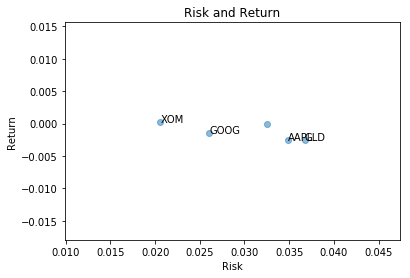

In [28]:
fig, ax = plt.subplots()
ax.scatter(x=risk_d, y=return_d, alpha=0.5)
ax.set(title='Risk and Return', xlabel = 'Risk', ylabel='Return')

for i, sym in enumerate(syms): 
    ax.annotate(sym, (risk_d[i], return_d[i]))

In [29]:
def random_alloc(n): 
    alloc = np.random.rand(n)
    return alloc/sum(alloc)

def get_port_risk(alloc, normed): 
    port_val = (alloc * normed).sum(axis=1)
    return get_risk(port_val)

def get_port_return(alloc, normed): 
    port_val = (alloc * normed).sum(axis=1)
    return get_return(port_val)

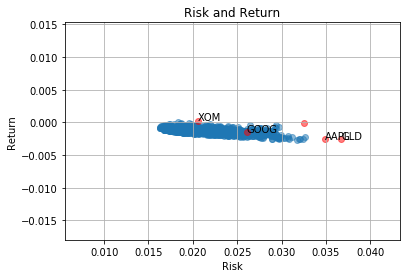

In [30]:
risk_all = np.array([])
return_all = np.array([])

np.random.seed(0)
for _ in range(0, 1000): 
    alloc = random_alloc(len(syms))
    port_val = (alloc * normed).sum(axis=1)
    risk = get_risk(port_val)
    ret = get_return(port_val)
    risk_all = np.append(risk_all, risk)
    return_all = np.append(return_all, ret)
    port_risk = get_port_risk(alloc, normed)

fig, ax = plt.subplots()
ax.scatter(x = risk_all, y = return_all, alpha=0.5)
ax.set(title ='Risk and Return', xlabel = 'Risk', ylabel='Return')

for i, sym in enumerate(syms): 
    ax.annotate(sym, (risk_d[i], return_d[i]))
ax.scatter(x=risk_d, y=return_d, alpha=0.5, color='red')
ax.set(title='Risk and Return',  xlabel = 'Risk', ylabel='Return')
ax.grid()

In [31]:
def optimize(prices, symbols, target_return=0.1):
    normalized_prices = prices / prices.ix[0, :]
    init_guess = np.ones(len(symbols)) * (1.0 / len(symbols))
    bounds = ((0.0, 1.0),) * len(symbols)
    weights = minimize(get_port_risk, init_guess,
                       args=(normalized_prices,), method='SLSQP',
                       options={'disp': False},
                       constraints=({'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)},
                                    {'type': 'eq', 'args': (normalized_prices,),
                                     'fun': lambda inputs, normalized_prices: target_return - get_port_return(inputs,normalized_prices)}),
                       bounds=bounds)
    return weights.x

In [36]:
def optimize(prices, symbols, target_return=0.1):
    normalized_prices = prices / prices.ix[0, :]
    init_guess = np.ones(len(symbols)) * (1.0 / len(symbols))
    bounds = ((0.0, 1.0),) * len(symbols)
    weights = minimize(get_port_risk, init_guess,
                       args=(normalized_prices,), method='SLSQP',
                       options={'disp': False},
                       constraints=({'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)},
                        ),
                       bounds=bounds)
    return weights.x

In [37]:
optimize(prices=prices, symbols=syms, target_return=0.04)

/Users/Ally.Zhang/Documents/VS Code/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


array([0.20793355, 0.20756062, 0.58450582, 0.        ])

In [45]:
normed.head(5)

,GOOG,AAPL,GLD,XOM
2008-01-02,1.000000,1.000000,1.000000,1.000000
2008-01-03,1.000204,1.000464,1.008367,1.003467
2008-01-04,0.958858,0.924076,1.003182,0.984698
2008-01-07,0.947547,0.911706,0.998939,0.975613
2008-01-08,0.921905,0.878924,1.022626,0.963060


In [46]:
syms

['GOOG', 'AAPL', 'GLD', 'XOM']

In [44]:
prices.head(5)

,GOOG,AAPL,GLD,XOM
2008-01-02,685.19,194.01,84.86,83.65
2008-01-03,685.33,194.10,85.57,83.94
2008-01-04,657.00,179.28,85.13,82.37
2008-01-07,649.25,176.88,84.77,81.61
2008-01-08,631.68,170.52,86.78,80.56


In [33]:
opt_w

array([nan, nan, nan, nan])

In [106]:
optimal_risk_all = np.array([])
optimal_return_all = np.array([])
for target_return in np.arange(0.005, 0.020, .001):
    opt_w = optimize(prices=prices, symbols=syms, target_return=target_return)
    optimal_risk_all = np.append(optimal_risk_all, get_port_risk(opt_w, normed))
    optimal_return_all = np.append(optimal_return_all, get_port_risk(opt_w, normed))

/Users/Ally.Zhang/Documents/VS Code/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


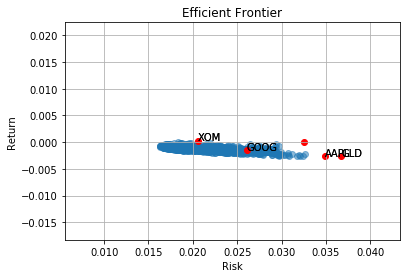

In [111]:
fig, ax = plt.subplots()
ax.scatter(x=risk_all, y=return_all, alpha=0.5)

for i, symbol in enumerate(syms):
    ax.annotate(symbol, (risk_d[i], return_d[i]))
ax.plot(optimal_risk_all, optimal_return_all, '-', color='green')

for i, symbol in enumerate(syms):
    ax.annotate(symbol, (risk_d[i], return_d[i]))
ax.scatter(x=risk_d, y=return_d, color='red')
ax.set(title='Efficient Frontier', xlabel='Risk', ylabel='Return')
ax.grid()

plt.show()
# plt.savefig('return_risk_efficient_frontier.png', bbox_inches='tight')

In [57]:
def compute_daily_returns(df): 
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1 
    daily_returns.iloc[0] = 0 
    return daily_returns

In [38]:
allocs = np.asarray([0.2, 0.2, 0.3, 0.3])
normed = prices/prices.iloc[0]
alloced = normed * allocs
port_val = alloced.sum(axis=1)

In [ ]:
daily_rets = compute_daily_returns(port_val)

In [60]:
daily_rets = daily_rets[1:]
cum_ret = (port_val[-1]/port_val[0] - 1)

In [62]:
import scipy.optimize as spo 

In [47]:
def compute_daily_returns(df):
	daily_returns = df.copy()
	daily_returns[1:] = (df[1:] / df[:-1].values) - 1
	daily_returns.iloc[0, :] = 0 
	return daily_returns


In [67]:
def get_sr(allocs, normed): 
    pos_vals = normed * allocs
    port_val = pos_vals.sum(axis=1)
    daily_rets = compute_daily_returns(pd.DataFrame(port_val))
    daily_rets = daily_rets[1:]
    sr =  - np.mean(daily_rets) / np.std(daily_rets)	
    return sr

In [87]:
np.sqrt(75) * 0.003/0.01

2.5980762113533165

In [52]:
allocs = np.array([0.25, 0.25,0.25,0.25])
pos_vals = normed * allocs

In [62]:
daily_return = compute_daily_returns(pd.DataFrame(pos_vals.sum(axis=1)))

In [61]:
get_sr(np.array([0.25, 0.25,0.25,0.25]), normed)

0    0.060324
dtype: float64

In [20]:
normed.head()

,GOOG,AAPL,GLD,XOM
2008-01-02,1.000000,1.000000,1.000000,1.000000
2008-01-03,1.000204,1.000464,1.008367,1.003467
2008-01-04,0.958858,0.924076,1.003182,0.984698
2008-01-07,0.947547,0.911706,0.998939,0.975613
2008-01-08,0.921905,0.878924,1.022626,0.963060


In [68]:
def optimize(normed_prices, symbols):
    init_guess = np.ones(len(symbols)) * (1.0 / len(symbols))
    bounds = ((0.0, 1.0),) * len(symbols)
    weights = minimize(get_sr, init_guess,
                       args=(normed_prices,), method='SLSQP',
                       options={'disp': False},
                       constraints=({'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)}),
                       bounds=bounds)
    return weights.x

In [69]:
sd=dt.datetime(2008, 1, 1)  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
ed=dt.datetime(2009, 1, 1)  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
syms=["GOOG", "AAPL", "GLD", "XOM"]

dates = pd.date_range(sd, ed)  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
prices_all = get_data(syms, dates)  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
prices = prices_all[syms] 		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
prices_SPY = prices_all["SPY"] 


In [71]:
normed = prices/prices.iloc[0]
allocs = optimize(normed_prices=normed, symbols=syms)
port_val = (allocs * prices).sum(axis=1)

In [77]:
df_temp = pd.concat(  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
[port_val, prices_SPY], keys=["Portfolio", "SPY"], axis=1  		  	   		  	  			  		 			 	 	 		 	)  

In [80]:
df = df_temp/df_temp.iloc[0]

In [85]:
def plot_data(df, title="Normalized Portfolio Value vs SPY"):
   
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')
    plt.show()

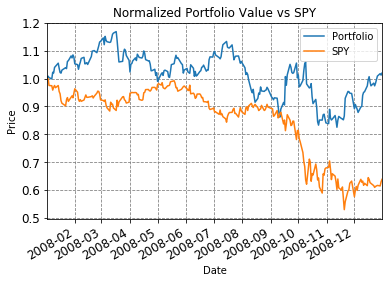

In [86]:
plot_data(df)